In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import math

In [2]:
def calcCentroid(data, xCord, yCord, pRad):

  #X Calculation
  
  sumArrayX = data.sum(axis = 0) 
  
  weightMeanX = 0
  sumColumn = 0
  for i in range(len(sumArrayX)):
    weightMeanX += sumArrayX[i] * (i+1)
    sumColumn += sumArrayX[i]
  x = weightMeanX/sumColumn 

  #Y Calculation 
  sumArrayY = data.sum(axis = 1)

  weightMeanY = 0
  sumRow = 0
  for i in range(len(sumArrayY)):
    weightMeanY += sumArrayY[i] * (i+1)
    sumRow += sumArrayY[i]
  y = weightMeanY/sumRow

  uncertaintyX, uncertaintyY = obtainUncertainty(sumArrayX, sumArrayY, [x,y])

  return [x + xCord - (pRad + 1), y + yCord - (pRad + 1), uncertaintyX, uncertaintyY]

In [3]:
def obtainROI(pRad, xCord, yCord, data):
  refinedData = data[yCord - pRad: yCord + pRad + 1, xCord - pRad: xCord + pRad + 1]
  
  plt.imshow(refinedData)
  plt.gray()
  plt.show()
  return refinedData

In [4]:
def obtainUncertainty(xArray, yArray, cen):
  x, y = cen
  

  #X Calculation
  sumX = sum(xArray)
  arrayUnCertainX = []
  for i in range(len(xArray)):
    arrayUnCertainX.append(((i + 1) - x) ** 2)
  
  numeratorX = 0
  for i in range(len(xArray)):
    numeratorX += xArray[i] * arrayUnCertainX[i]
  uncertaintyX = math.sqrt((numeratorX)/(sumX * (sumX-1)))


  #Y Calculation
  sumY = sum(yArray)
  arrayUnCertainY = []
  for i in range(len(yArray)):
    arrayUnCertainY.append(((i + 1) - y) ** 2)
  
  numeratorY = 0
  for i in range(len(yArray)):
    numeratorY += yArray[i] * arrayUnCertainY[i]
  uncertaintyY = math.sqrt((numeratorY)/(sumY * (sumY-1)))

  return uncertaintyX, uncertaintyY

In [5]:
def obtainCentroid(fileName, xCord, yCord, pRad):
  imageDataROI = obtainROI(pRad, xCord, yCord, fits.getdata(fileName))
  centroid = calcCentroid(imageDataROI, xCord, yCord, pRad)
  return centroid

In [6]:
asteroid_img_data = np.array([[0, 33, 21, 33, 8],
                             [0, 56, 51, 53, 26],
                             [23, 120, 149, 73, 18],
                             [55, 101, 116, 50, 16],
                             [11, 78, 26, 2, 10]])

example = np.array([[4,6,3], [7,10,3], [3,3,3]])
#print(calcCentroid(asteroid_img_data,2,2))
#Thanks for Andrew for typing this out


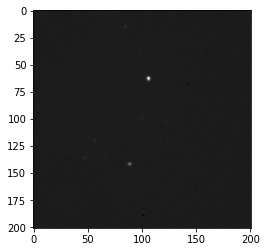

[350.9317082654429, 153.95256407274132, 0.005702666627199866, 0.005703652074885509]


In [8]:
print(obtainCentroid("sampleimage.fits", 351, 154, 50))